In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
def showImg(img):
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [124]:
img = cv2.imread('cars.jpg', 1)
showImg(img)

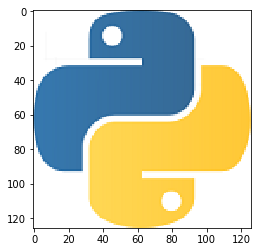

In [8]:
img2 = cv2.imread('mainlogo.png', 1)
showImg(img2)

In [9]:
rows, cols, channels = img2.shape
roi = img[:rows, :cols]

In [17]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# showImg(img2gray)

In [18]:
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
# showImg(mask)

In [19]:
mask_inv = cv2.bitwise_not(mask)
# showImg(mask_inv)

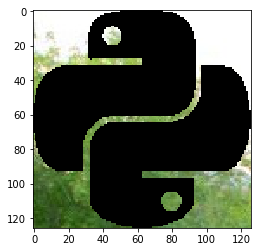

In [13]:
img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
showImg(img_bg)

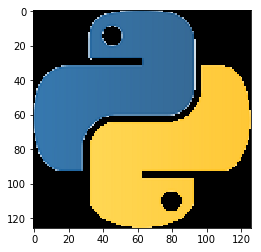

In [14]:
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
showImg(img2_fg)

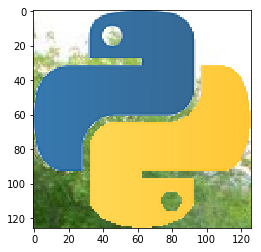

In [15]:
dst = cv2.add(img_bg, img2_fg)
showImg(dst)

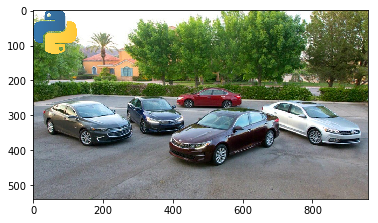

In [16]:
img[:rows, :cols] = dst
showImg(img)

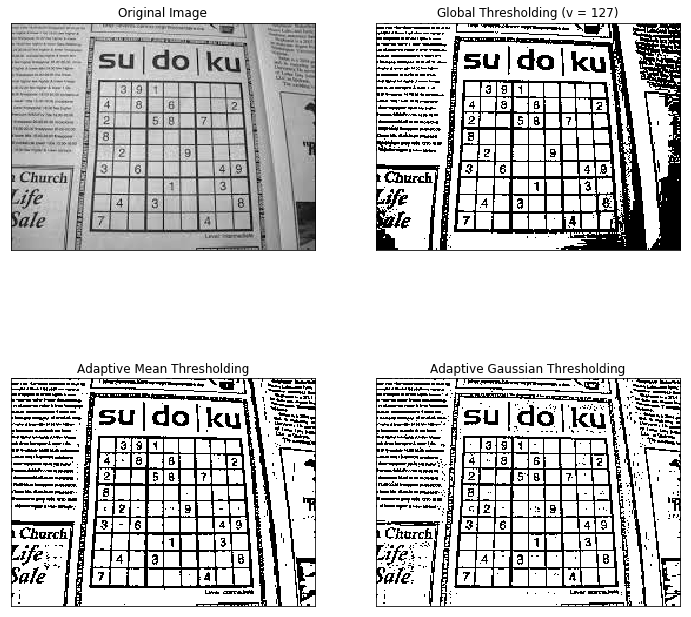

In [40]:
img = cv2.imread('sudoku.jpg',0)
# img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,5)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,5)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.subplots(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

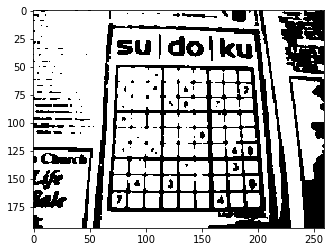

In [45]:
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3,'gray')

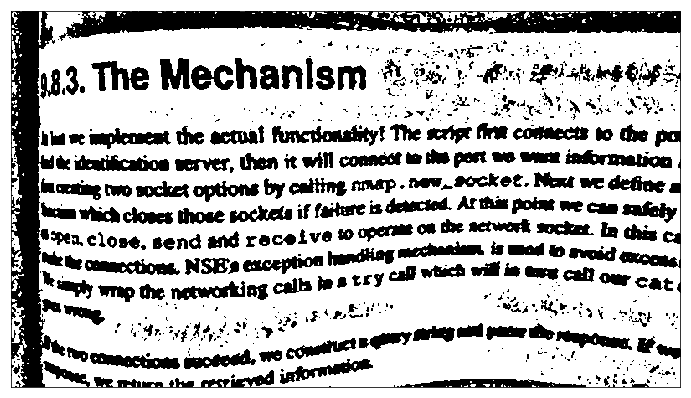

In [123]:
img = cv2.imread('bookpage.jpg')
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(grayscaled,(3,3),0)
th3 = cv2.adaptiveThreshold(grayscaled,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
# cv2.imshow('original',img)
# showImg(th3)
plt.figure(figsize=(12,12))
plt.xticks([]), plt.yticks([])
plt.imshow(th3, 'gray');

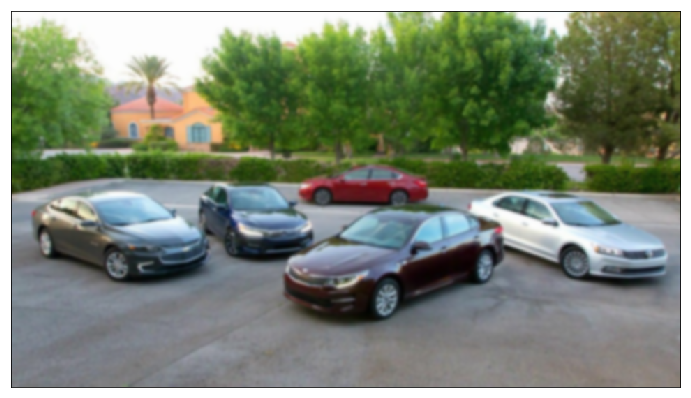

In [133]:
plt.figure(figsize=(12,12))
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(cv2.GaussianBlur(img,(11,11),0), cv2.COLOR_BGR2RGB));